In [2]:
import nltk
nltk.download('stopwords') # resource: https://pythonspot.com/nltk-stop-words/
stops = set(stopwords.words('english'))

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pickle
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [44]:
le = LabelEncoder()
df_all['binary_pharm_1'] = pd.DataFrame(le.fit_transform(df_all['binary']), columns=['binary'])
df_all.head(3)

,00,000,000421,001274,00527172874,01,01d08e1e,01t11,02,03,...,zinc,zolmitriptan,zostavax,évidence,úlcera,ımportant,ınformatıon,ıs,binary,binary_pharm_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,pharmacist,1


In [45]:
X = df_all.drop(columns=['binary', 'binary_pharm_1'])
y = df_all['binary_pharm_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify=y)
y_train.value_counts(normalize=True)

In [49]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, lg.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, lg.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, lg.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, lg.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap='Greens');

LogisticRegression()

In [54]:
lg.coef_

array([[ 0.07745127, -0.09649402, -0.00406703, ..., -0.00173374,
        -0.00173374, -0.00346747]])

In [55]:
conv_odds = pd.DataFrame(np.exp(lg.coef_[0]), index=lg.feature_names_in_, columns = ['coef_val'])
conv_odds.sort_values(by='coef_val', ascending=True).head(25)

,coef_val
problem,0.550822
get,0.556100
disease,0.559734
surgery,0.567874
shingles,0.585485
syndrome,0.592697
back,0.599488
would,0.601114
location,0.615077
treatment,0.617482


In [56]:
conv_odds.sort_values(by='coef_val', ascending=True).tail(25)

,coef_val
product,1.791311
gelatin,1.793384
reactions,1.796775
instructions,1.815583
day,1.824776
lower,1.831126
glucosamine,1.840661
effects,1.853131
new,1.862429
topical,1.940510


In [57]:
over_sam = RandomOverSampler(random_state=13)
X_resampled, y_resampled = over_sam.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=13, stratify=y_resampled)

In [61]:
lg2 = LogisticRegression()
lg2.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, lg2.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, lg2.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, lg2.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, lg2.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(lg2, X_test, y_test, cmap='Greens');

LogisticRegression()

In [67]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, rfc.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, rfc.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, rfc.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, rfc.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Greens');

RandomForestClassifier(n_jobs=-1)

In [73]:
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, gbc.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, gbc.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, gbc.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, gbc.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test, cmap='Greens');

GradientBoostingClassifier(n_estimators=50)

--- 

In [88]:
from bertopic import BERTopic

In [100]:
topic_model = BERTopic()
topic_model

In [101]:
pharm_docs = df_vec['message'][df_vec['binary'] == 'pharmacist'].to_list()

In [102]:
topics, probabilities = topic_model.fit_transform(pharm_docs)

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [109]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,60,-1_the_to_is_and
1,0,37,0_the_to_message_it
2,1,28,1_gluten_you_message_free
3,2,14,2_the_for_my_to


In [108]:
topic_model.get_topic(2)

[('the', 0.07138237813999879),
 ('for', 0.06707208486870866),
 ('my', 0.06529622157834708),
 ('to', 0.058894377683164974),
 ('and', 0.056876593780870725),
 ('has', 0.050496536152533654),
 ('message', 0.049692260623696756),
 ('is', 0.04766718645390927),
 ('subject', 0.046765835859943435),
 ('of', 0.04596120874716621)]

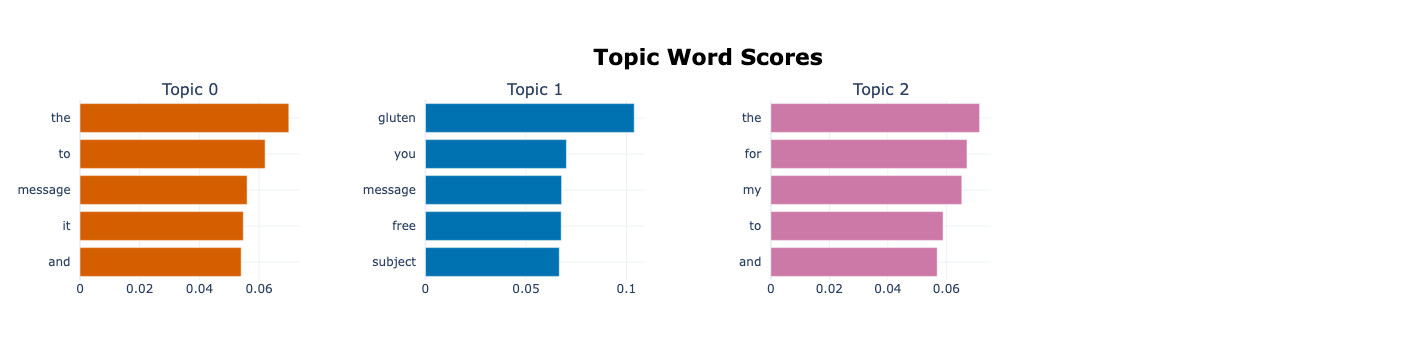

In [110]:
topic_model.visualize_barchart()

In [111]:
topic_model2 = BERTopic()
topic_model2

In [112]:
intern_docs = df_vec['message'][df_vec['binary'] == 'internist'].to_list()

In [114]:
topics, probabilities = topic_model2.fit_transform(intern_docs)

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [116]:
topic_model2.get_topic_info()

,Topic,Count,Name
0,0,843,0_to_the_and_my
1,1,18,1_ear_hearing_and_in


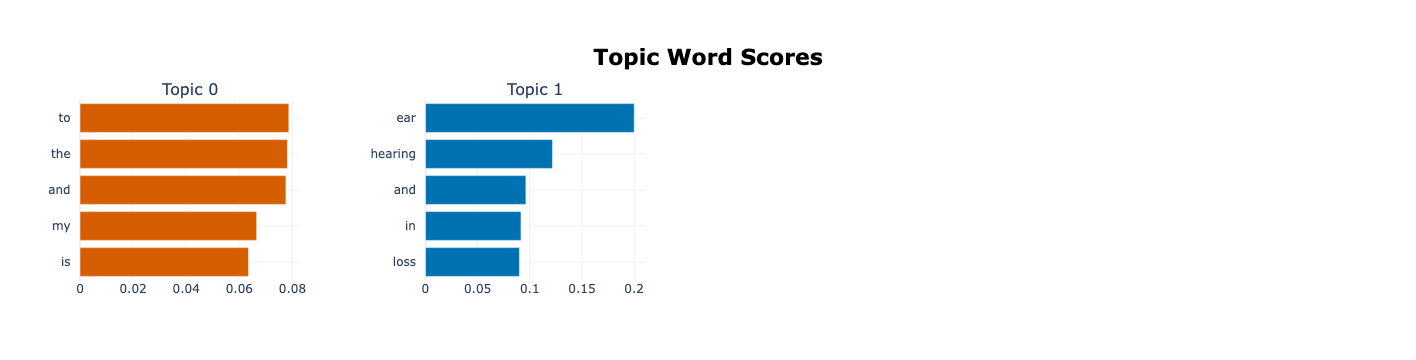

In [118]:
topic_model2.visualize_barchart()

---

In [78]:
rfc2_params = {
    'n_estimators' : [10, 50, 100, 150],
    'min_samples_split' : [2, 3, 4],
    'max_depth' : [None, 3, 4, 5]
}

rfc2 = RandomForestClassifier()
# default= estimators,100; min split,2; max depth,None 

gs = GridSearchCV(rfc2, rfc2_params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_estimator_

The best model is the defualt parameters, wow

---

Using a pipeline so I can vec and model custom questions/phrases in the app

In [83]:
df_vec.head(3)

,message,binary
0,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist
1,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist
2,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist


In [84]:
le2 = LabelEncoder()
df_vec['binary_dummy'] = pd.DataFrame(le2.fit_transform(df_vec['binary']), columns=['binary'])
df_vec.drop(columns=['binary'], inplace=True)
df_vec.head(3)

/var/folders/3x/mhg15qwn5vs8792nlh38tg080000gn/T/ipykernel_27617/376799117.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,message,binary,binary_dummy
0,SUBJECT: who and where to get cetirizine - D\n MESSAGE: I need/want to know who manufscturs Cetirizine. My Walmart is looking for a new supply and are not getting the recent,pharmacist,1
1,"who makes bromocriptine\n i am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them. thanks.",pharmacist,1
2,"SUBJECT: nulytely\n MESSAGE: Hello can you tell me where do i order the nulytely who is the manufacture, what phone number can i call. thanks.",pharmacist,1


In [87]:
X = df_vec[['message']]
y = df_vec['binary_dummy']

over_sam = RandomOverSampler(random_state=13)
X_resampled, y_resampled = over_sam.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled['message'], y_resampled, random_state=13, stratify=y_resampled)   
# used X_resampled['message'] to make it a series so it would work with the pipeline

In [92]:
pipe = Pipeline([
    ('cv2', CountVectorizer(stop_words=stops)),
    ('rfc3', RandomForestClassifier(n_jobs=-1))
])

pipe.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, pipe.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, pipe.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, pipe.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, pipe.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Greens');

In [98]:
pipe.predict(['Can I store my medication in the freezer or will that reduce their efficacy?'])

array([0])

In [115]:
pipe.predict(['What dose of my medicine should i take in the mornings? who manufactures this medication?'])

array([0])

In [210]:
pipe2 = Pipeline([
    ('cv2', CountVectorizer(stop_words=stops)),
    ('lg3', LogisticRegression(n_jobs=-1))
])

pipe2.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, pipe2.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, pipe2.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, pipe2.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, pipe2.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(pipe2, X_test, y_test, cmap='Greens');

In [103]:
pipe2.predict(['Will storing my medication in the freezer reduce their efficacy?'])

array([0])

In [114]:
pipe2.predict(['What dose of my medicine should i take in the mornings? who manufactures this medication?'])

array([0])

Train Acc Score:  0.9581719597211464
Test F1 Score:  0.9095127610208816
Train Acc Score:  0.9592760180995475
Test F1 Score:  0.9142857142857143


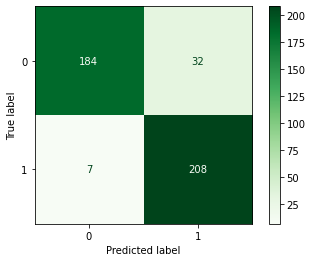

In [106]:
pipe3 = Pipeline([
    ('cv2', CountVectorizer(stop_words=stops)),
    ('gbc', GradientBoostingClassifier())
])

pipe3.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, pipe3.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, pipe3.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, pipe3.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, pipe3.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(pipe3, X_test, y_test, cmap='Greens');

In [107]:
pipe3.predict(['Will storing my medication in the freezer reduce their efficacy?'])

array([0])

In [108]:
pipe3.predict(['What dose of my medicine should i take in the mornings? who manufactures this medication?'])

array([1])

In [157]:
X_test.index = pd.DataFrame(pipe.predict(X_test)).index  # resource: https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
eval_df = pd.concat([X_test, pd.DataFrame(pipe.predict(X_test), columns=['preds'])], axis=1)

eval_df.index = pd.DataFrame(y_test).index
eval_df = pd.concat([eval_df, pd.DataFrame(y_test)], axis=1)

eval_df.head(3)

In [211]:
eval_df[eval_df['preds'] != eval_df['binary_dummy']]

,message,preds,binary_dummy
562,SUBJECT: vaginal rashes after periods that leads to vaginal itching\n MESSAGE: period rashes proceed to vaginal itching. then it develop fungal infection with thick white discharge. i then take flucanazole (antifungal)which cure it. but m worried of taking allopatic medicines. pls tell me what primitive or traditional methods do i use to avoid it. i also have a sensitive skin.,1,0
87,SUBJECT: SEVERE leg cramps with Lupus\n MESSAGE: My wife has Systemic Lupus and is already taking Potassium Chloride 20meg er 1QD and about 24-48 ounces of Gatoraid every day but still gets SEVERE leg cramps. What can she do to stop or help stop the cramps?,1,0
86,SUBJECT: adema\n MESSAGE: I have adema in my ankles/shins. What can I do to lesson the severity of the adema ( I take bp meds w/ diaretic) ?,1,0
252,"SUBJECT: Need glucosamine sulfate not containing shellfish meats\n MESSAGE: Can you please help me? I have been taking a glucosamine sulfate product with MSM for my arthritis. My nutritionist warned me I could develop a shellfish allergy if it is made from the shellfish meat. The customer service of the product that I am taking confirmed their product is made from the shellfish meat of 3 crustaceans. Can you direct me to how I can find this product not made from the meats, but the shells instead. (I don't want the vegetarian version because it is so hard on the stomach). I appreciate your help.",1,0
726,SUBJECT: blocked ear drum\n MESSAGE: got a head cold and now left ear drum has bean blocked for three weeks now.taking amoxicillin trihydrate three times a day also apo-mometasone spray once a day. its bean five days now on medication and not any better,1,0


---

Going to try using just the summarized questions. The code is not available for the summarizer model the original people used so I'm not going to try to recreate it.

In [174]:
df_sum = questions[['Summary', 'binary']]
df_sum.head(3)

,Summary,binary
0,Who manufactures cetirizine?,pharmacist
1,Who manufactures bromocriptine?,pharmacist
2,"Who makes nulytely, and where can I buy it?",pharmacist


In [176]:
le3 = LabelEncoder()
df_sum['binary_dummy'] = pd.DataFrame(le3.fit_transform(df_sum['binary']), columns=['binary'])
df_sum.drop(columns=['binary'], inplace=True)
df_sum.head(3)

/var/folders/3x/mhg15qwn5vs8792nlh38tg080000gn/T/ipykernel_27617/2189746953.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Summary,binary,binary_dummy
0,Who manufactures cetirizine?,pharmacist,1
1,Who manufactures bromocriptine?,pharmacist,1
2,"Who makes nulytely, and where can I buy it?",pharmacist,1


In [180]:
X = df_sum[['Summary']]
y = df_sum['binary_dummy']

over_sam = RandomOverSampler(random_state=13)
X_resampled, y_resampled = over_sam.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled['Summary'], y_resampled, random_state=13, stratify=y_resampled)   

In [182]:
pipe4 = Pipeline([
    ('cv3', CountVectorizer(stop_words=stops)),
    ('rfc4', RandomForestClassifier(n_jobs=-1))
])

pipe4.fit(X_train, y_train)

print(f'Train Acc Score: ', accuracy_score(y_train, pipe4.predict(X_train)))
print(f'Test F1 Score: ', accuracy_score(y_test, pipe4.predict(X_test)))
print(f'Train Acc Score: ', f1_score(y_train, pipe4.predict(X_train)))
print(f'Test F1 Score: ', f1_score(y_test, pipe4.predict(X_test)))

print(f'Train Sensitivity Score: ', recall_score(y_train, pipe4.predict(X_train)))
print(f'Test Sensitivity Score: ', recall_score(y_test, pipe4.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(pipe4, X_test, y_test, cmap='Greens');

In [187]:
pipe4.predict(['Will storing my medication in the freezer reduce their efficacy?'])

array([1])

In [188]:
pipe4.predict(['I want to see what kind of gelatin is used in vitamin d. is it from pork?'])

array([1])

In [189]:
pipe4.predict(['What dose of my medicine should i take in the mornings? who manufactures this medication?'])

array([1])

In [194]:
pipe4.predict(['I cant afford the brand name albuterol product. What are some generic versions of this medication'])

array([0])

In [195]:
pipe4.predict(['I hit my leg on the coffee table corner. I have a bruise. Am I dying?'])

array([0])

In [196]:
pipe4.predict(['What are the symptoms of a heart attack?'])

array([0])

This works so much better - far more accurate when using predictions

Changing it now to a chat that first pushes message through summarizer, then through my classification model. I don't have access to the code they used for their summarizer, but maybe I can find my own?

In [208]:
with open('rfc-pipe-model.pkl', 'wb') as file:
    pickle.dump(pipe4, file)

In [ ]:
# source for streamlit: https://github.com/andfanilo/social-media-tutorials/blob/master/20220124-streamlitchat/streamlit_app.py

In [ ]:
# reset button: https://discuss.streamlit.io/t/is-it-possible-to-create-a-button-to-reset-relaod-the-whole-dashboard/6615/3